In [22]:
import collections
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

# 0: Empty
# 1: Start point
# 2: End point
# 3: Gate zone
# 4: Barrier
# 5: Last gate zone 

grid = np.array([
   # C0 C1 C2 C3 C4 C5 C6 C7 C8
    [0, 0, 5, 0, 0, 0, 0, 4, 2],  # R0
    [0, 0, 0, 4, 0, 0, 0, 0, 0],  # R1
    [3, 0, 0, 0, 0, 4, 0, 0, 0],  # R2
    [0, 4, 0, 4, 0, 0, 0, 0, 0],  # R3
    [0, 0, 3, 0, 3, 0, 0, 0, 0],  # R4
    [0, 9, 0, 4, 0, 4, 0, 4, 0],  # R5
    [0, 0, 1, 0, 0, 0, 3, 0, 0]   # R6
])

rows, cols = grid.shape
start_pos = None
end_pos = None
gate3_locs = []
gate5_pos = None

for r_idx in range(rows):
    for c_idx in range(cols):
        if grid[r_idx, c_idx] == 1:
            start_pos = (r_idx, c_idx)
        elif grid[r_idx, c_idx] == 2:
            end_pos = (r_idx, c_idx)
        elif grid[r_idx, c_idx] == 3:
            gate3_locs.append((r_idx, c_idx))
        elif grid[r_idx, c_idx] == 5:
            gate5_pos = (r_idx, c_idx)

if not start_pos: raise ValueError("Start position (1) not found in grid.")
if not end_pos: raise ValueError("End position (2) not found in grid.")
if not gate5_pos: raise ValueError("Last gate (5) not found in grid.")

print(f"Start: {start_pos}")
print(f"End: {end_pos}")
print(f"Gates: {gate3_locs}")
print(f"Last Gate: {gate5_pos}")

Start: (6, 2)
End: (0, 8)
Gates: [(2, 0), (4, 2), (4, 4), (6, 6)]
Last Gate: (0, 2)


In [23]:
def bfs(grid_map, start_node, target_nodes_set):
    q = collections.deque([(start_node, [start_node])])
    visited = {start_node}
    map_rows, map_cols = grid_map.shape

    moves = [(-2, 0), (2, 0), (0, 2), (0, -2)]

    while q:
        (curr_r, curr_c), path = q.popleft()

        if (curr_r, curr_c) in target_nodes_set:
            return path, (curr_r, curr_c) 

        for dr, dc in moves:
            next_r, next_c = curr_r + dr, curr_c + dc

            if 0 <= next_r < map_rows and 0 <= next_c < map_cols:
                wall_r, wall_c = curr_r + dr // 2, curr_c + dc // 2

                if grid_map[wall_r, wall_c] == 4:
                    continue

                if grid_map[next_r, next_c] != 4 and (next_r, next_c) not in visited:
                    visited.add((next_r, next_c))
                    new_path = list(path)
                    new_path.append((next_r, next_c))
                    q.append(((next_r, next_c), new_path))
    
    return None, None

In [44]:
full_path = []
current_pos = start_pos

full_path.append(start_pos)

gates = set(gate3_locs)

while gates:
    if current_pos in gates:
        gates.remove(current_pos)
        if not gates:
            break

    path_segment, found_gate = bfs(grid, current_pos, gates)
    
    if not path_segment:
        raise Exception(f"Pathfinding failed: Cannot reach any remaining gate from {current_pos}. Targets left: {gates}")

    if len(path_segment) > 1:
        full_path.extend(path_segment[1:])
    
    current_pos = found_gate
    if found_gate in gates:
         gates.remove(found_gate)

if gate5_pos:
    if current_pos != gate5_pos:
        path_segment, _ = bfs(grid, current_pos, {gate5_pos})
        if not path_segment:
            raise Exception(f"Pathfinding failed: Cannot reach Final Gate {gate5_pos} from {current_pos}")
        if len(path_segment) > 1:
            full_path.extend(path_segment[1:])
    current_pos = gate5_pos

if end_pos:
    if current_pos != end_pos:
        path_segment, _ = bfs(grid, current_pos, {end_pos})
        if not path_segment:
            raise Exception(f"Pathfinding failed: Cannot reach End Point {end_pos} from {current_pos}")
        if len(path_segment) > 1:
            full_path.extend(path_segment[1:])
    # current_pos = end_pos
print("\n Final Path")
print(full_path)


 Final Path
[(6, 2), (4, 2), (4, 4), (6, 4), (6, 6), (4, 6), (4, 4), (2, 4), (2, 2), (2, 0), (0, 0), (0, 2), (0, 4), (0, 6), (2, 6), (2, 8), (0, 8)]


Total path length: 17


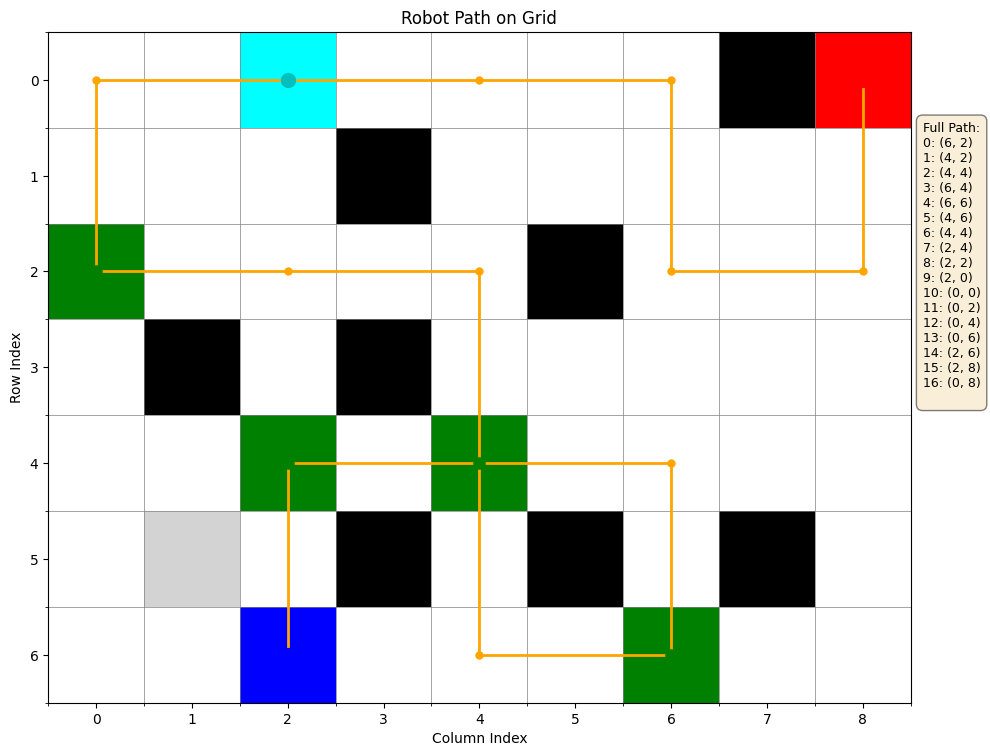